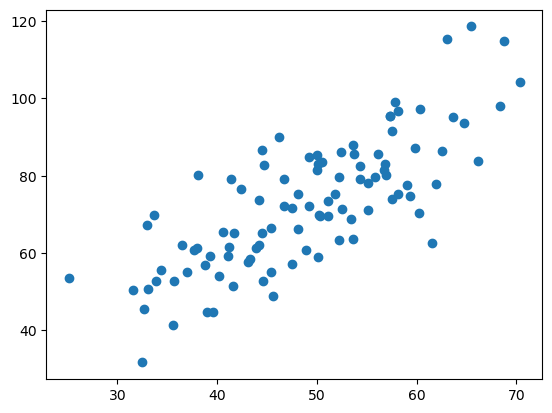

In [26]:
import numpy as np
import matplotlib.pyplot as plt

from math import pow
import random
## 1. 导入数据data.csv
points = np.genfromtxt('data.csv',delimiter=',')
 
## points 二维数组
##[[ 32.50234527,  31.70700585],
##[ 53.42680403,  68.77759598]]
 
## 提取points 中的两列数据，分别作为x,y 
x=points[:,0]##第一列 
y=points[:,1]##第二列
 
## 用plt画出散点图 
 
plt.scatter(x,y)
plt.show()

-20.72 -------- -1.48 ------- 0.002072 ------ 0.000148
-97.64779232 -------- -1.87784216 ------- 0.011836779232000001 ------ 0.000335784216
-72.6621163699536 -------- -1.7300503897608 ------- 0.019102990868995362 ------ 0.00050878925497608
-14.103331162619016 -------- -0.16789679955498826 ------- 0.020513323985257265 ------ 0.0005255789349315788
-38.56644504745216 -------- -0.6766042990781082 ------- 0.024369968490002482 ------ 0.0005932393648393897
-6.980894163593929 -------- -0.6346267421449027 ------- 0.025068057906361876 ------ 0.0006567020390538799
-59.31999810533217 -------- -0.8238888625740579 ------- 0.031000057716895093 ------ 0.0007390909253112857
-12.375027641276313 -------- -0.951925203175101 ------- 0.03223756048102273 ------ 0.0008342834456287958
-141.50810763661886 -------- -1.9122717248191736 ------- 0.04638837124468462 ------ 0.001025510618110713
-0.7715885625388701 -------- -0.2571961875129567 ------- 0.046465530100938505 ------ 0.0010512302368620087
w is : 0.04646553

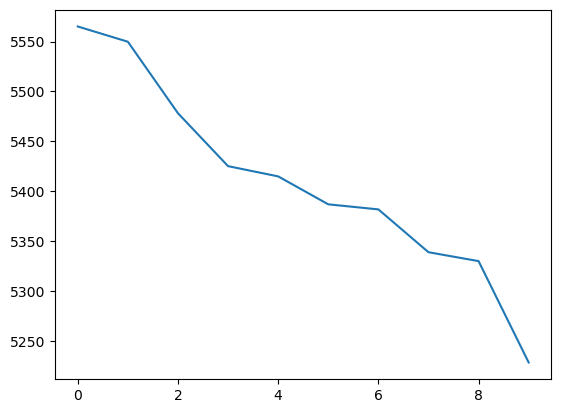

In [28]:
### 2.定义损失函数
#损失函数是系数的函数，另外还要传入数据的x,y 
def compute_cost(w,b,points):
    total_cost = 0 
    M = len(points)
    
    # 逐点计算平方损失误差，然后求平均数
    for i in range(M):
        x = points[i,0]
        y = points[i,1]
        total_cost+= (y - w*x - b)**2
        
    return total_cost/M
 
## 3.定义模型的超参数
 
alpha=0.0001
initial_w = 0  #初始值
initial_b = 0 
num_iter = 10  #迭代次数
 
## 4.定义核心梯度下降算法函数
 
def grad_desc(points,initial_w,initial_b,alpha,num_iter):
    w = initial_w
    b = initial_b 
    # 定义一个list保存所有的损失函数值，用来显示下降的过程 
    cost_list = []
    
    for i in range(num_iter):
        cost_list.append(compute_cost(w,b,points))
        w ,b = step_grad_desc(w,b,alpha,points) ##每一步的梯度下降
    
    return [w,b,cost_list]
 
def step_grad_desc(current_w,current_b,alpha,points):
    sum_grad_w = 0 
    sum_grad_b = 0 
    M = len(points)
    
    # 对每个点带入公式就和
  
    x = random.randrange(0,M)
    y = random.randrange(0,M)
    sum_grad_w += ( current_w * x + current_b - y)* x 
    sum_grad_b += ( current_w * x + current_b - y)
        
    # 用公式求当前梯度 
    grad_w = 2/M * sum_grad_w 
    grad_b = 2/M * sum_grad_b
    
    #梯度下降,更新当前的w和b
    update_w = current_w - alpha*grad_w 
    update_b = current_b - alpha*grad_b 
    print(grad_w,"--------",grad_b,"-------",update_w,"------",update_b)
    return update_w,update_b
 
## 5.测试：运行梯度下架算法计算最优的W 和 b
 
w,b,cost_list =grad_desc(points,initial_w,initial_b,alpha,num_iter)
 
print("w is :",w)
print("b is :",b)
 
cost = compute_cost(w,b,points)
print("cost is ",cost)
plt.plot(cost_list) # 不指定x,y的话，默认下标为x轴，值为y轴
plt.show()

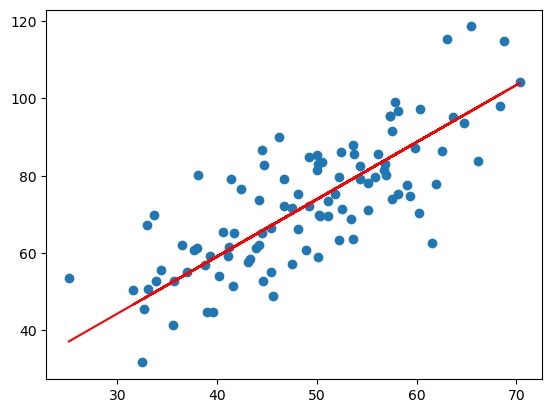

In [21]:
## 6. 画出拟合曲线
plt.scatter(x,y) ##散点图
# 针对每一个x,计算出预测的y值
pred_y = w * x + b
 
plt.plot(x,pred_y,c='r') ##点图
plt.show()